# Hidalgo and Hausmann (2009) metrics
In this notebooks we compute the metrics (Level 1 and 2) proposed by Hidalgo and Hausmann (2009), and we test their significance.


In [1]:
import sys

sys.path.insert(0, "../")

from scripts.hid_haus import hid_hous
import pandas as pd
import matplotlib.pyplot as plt
import scripts.features_extraction as fe
from scripts.plot_powerlaw import *
import numpy as np

## Compute the metrics

In [2]:
# Get the adjacency matrix from the data
adjacency_matrix = pd.read_csv(
    "../../dataset/large_adjacency_matrix.csv", compression="gzip"
).values
data_onehot = pd.read_csv(
    "../../dataset/large_one_hot_encoding.csv", compression="gzip"
)

# Remove the last column of the adjacency matrix
# adjacency_matrix = adjacency_matrix[:, :-1]
level = 2
[kd, ks] = hid_hous(adjacency_matrix, level)

## First level metrics (degree) distribution 

Text(0, 0.5, 'Frequency (log scale)')

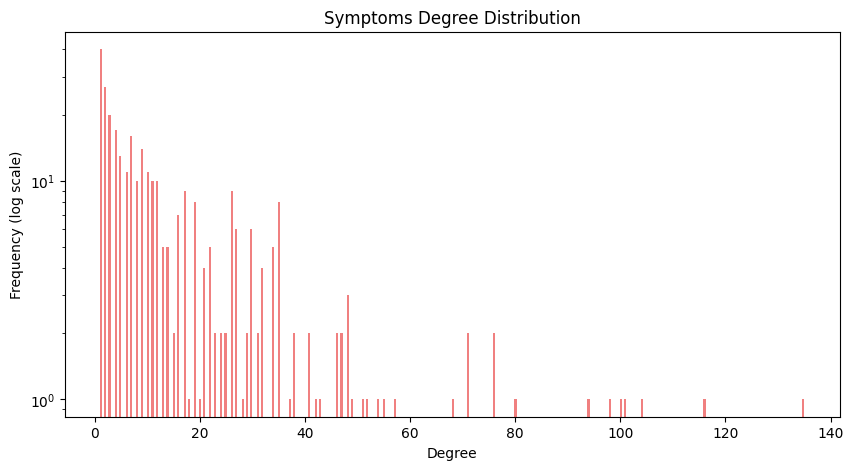

In [3]:
# Plot the distribution in log scale of the degree of the symptoms
plt.figure(figsize=(10, 5))
plt.hist(ks[:, 0], bins=ks.shape[0], log=True, color="lightcoral")
plt.title("Symptoms Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency (log scale)")

Text(0, 0.5, 'Frequency (log scale)')

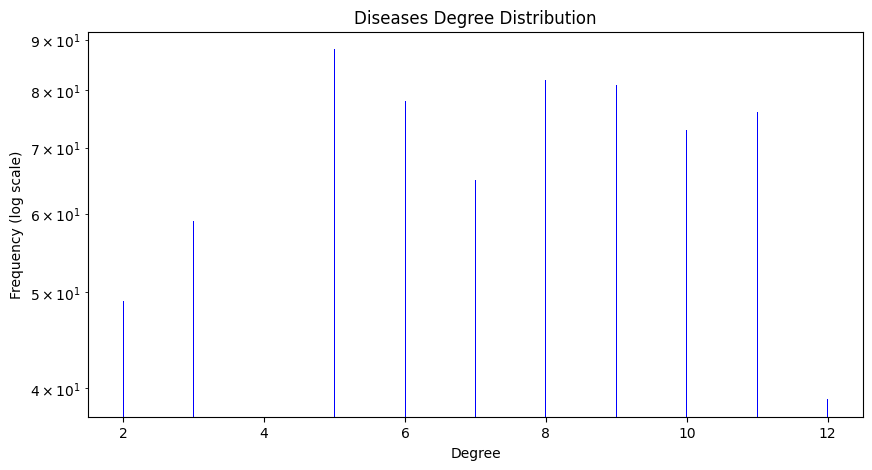

In [4]:
# Plot the distribution in log scale of the degree of the diseases
plt.figure(figsize=(10, 5))
plt.hist(kd[:, 0], bins=kd.shape[0], log=True, color="blue")
plt.title("Diseases Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency (log scale)")

## Second level metrics distribution

Text(0, 0.5, 'Frequency (log scale)')

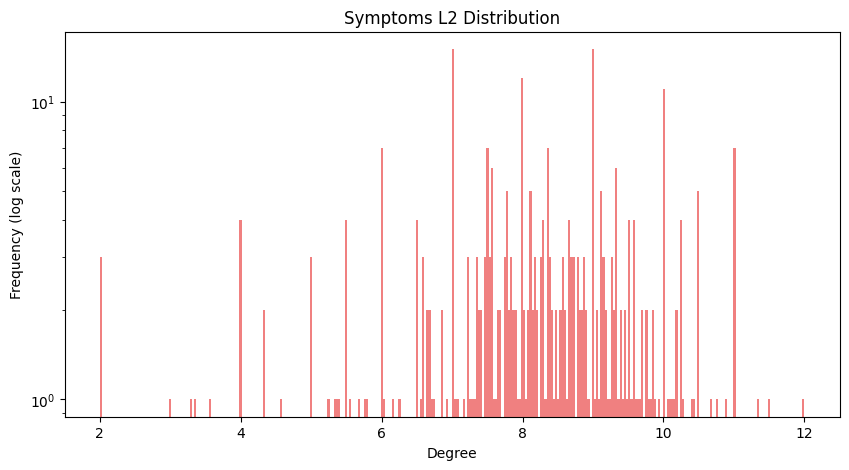

In [5]:
# Plot the distribution in log scale of the degree of the symptoms
plt.figure(figsize=(10, 5))
plt.hist(ks[:, 1], bins=ks.shape[0], log=True, color="lightcoral")
plt.title("Symptoms L2 Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency (log scale)")

Text(0, 0.5, 'Frequency (log scale)')

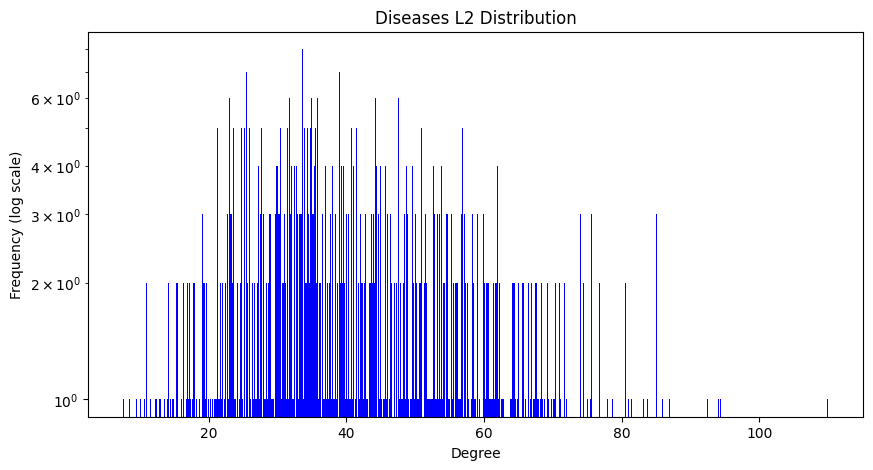

In [6]:
# Plot the distribution in log scale of the degree of the diseases
plt.figure(figsize=(10, 5))
plt.hist(kd[:, 1], bins=kd.shape[0], log=True, color="blue")
plt.title("Diseases L2 Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency (log scale)")

## Power Law Test L1

Some values were non-positive in your data.
Some values were non-positive in your data.


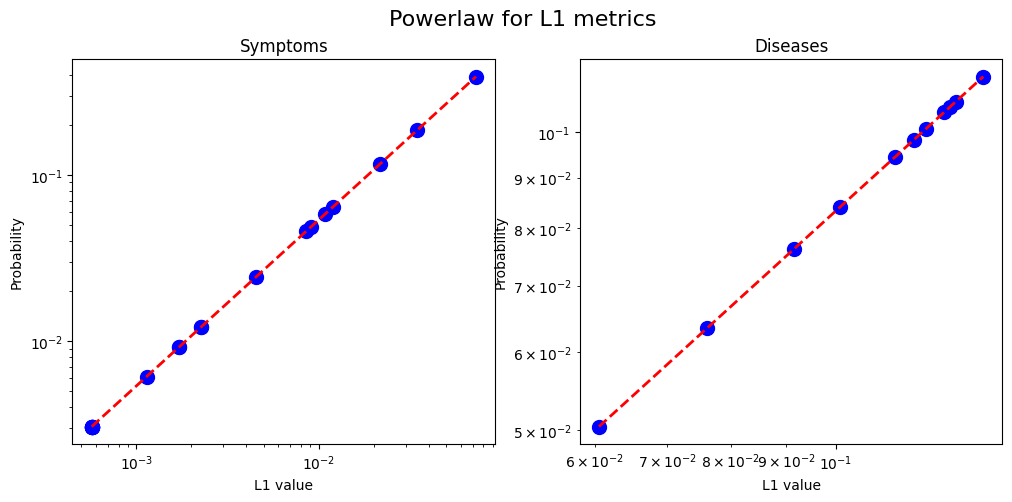

In [7]:
import numpy as np
import matplotlib.pyplot as plt

################# Symptoms #################
# Step 1: Create a histogram
x1, bin_edges = np.histogram(ks[:, 0], bins="auto", density=True)

# Step 2: Normalize the histogram
bin_widths = bin_edges[1:] - bin_edges[:-1]
pdf = x1 * bin_widths
y1 = pdf / np.sum(pdf)

################# Diseases #################

# Step 1: Create a histogram
x2, bin_edges = np.histogram(kd[:, 0], bins="auto", density=True)

# Step 2: Normalize the histogram
bin_widths = bin_edges[1:] - bin_edges[:-1]
pdf = x2 * bin_widths
y2 = pdf / np.sum(pdf)


# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle("Powerlaw for L1 metrics", fontsize=16)

# Plot the powerlaw fit for both symptoms and diseases

slope, intercept = plot_power_law_fit(
    x1, y1, y_label="Probability", x_label="L1 value", title="Symptoms", axes=axes[0]
)

slope, intercept = plot_power_law_fit(
    x2, y2, y_label="Probability", x_label="L1 value", title="Diseases", axes=axes[1]
)


## Power Law Test L2

Some values were non-positive in your data.


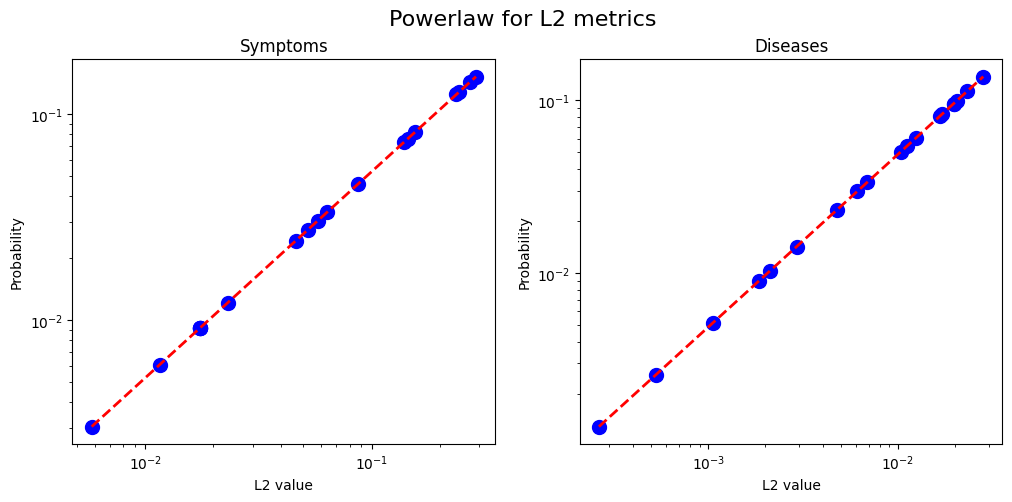

In [8]:
import numpy as np
import matplotlib.pyplot as plt

################# Symptoms #################
# Step 1: Create a histogram
x1, bin_edges = np.histogram(ks[:, 1], bins="auto", density=True)

# Step 2: Normalize the histogram
bin_widths = bin_edges[1:] - bin_edges[:-1]
pdf = x1 * bin_widths
y1 = pdf / np.sum(pdf)

################# Diseases #################

# Step 1: Create a histogram
x2, bin_edges = np.histogram(kd[:, 1], bins="auto", density=True)

# Step 2: Normalize the histogram
bin_widths = bin_edges[1:] - bin_edges[:-1]
pdf = x2 * bin_widths
y2 = pdf / np.sum(pdf)


# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle("Powerlaw for L2 metrics", fontsize=16)

# Plot the powerlaw fit for both symptoms and diseases

slope, intercept = plot_power_law_fit(
    x1, y1, y_label="Probability", x_label="L2 value", title="Symptoms", axes=axes[0]
)

slope, intercept = plot_power_law_fit(
    x2, y2, y_label="Probability", x_label="L2 value", title="Diseases", axes=axes[1]
)


## Assign to metrics values the corresponding symptom/disease name

<Axes: xlabel='Symptom'>

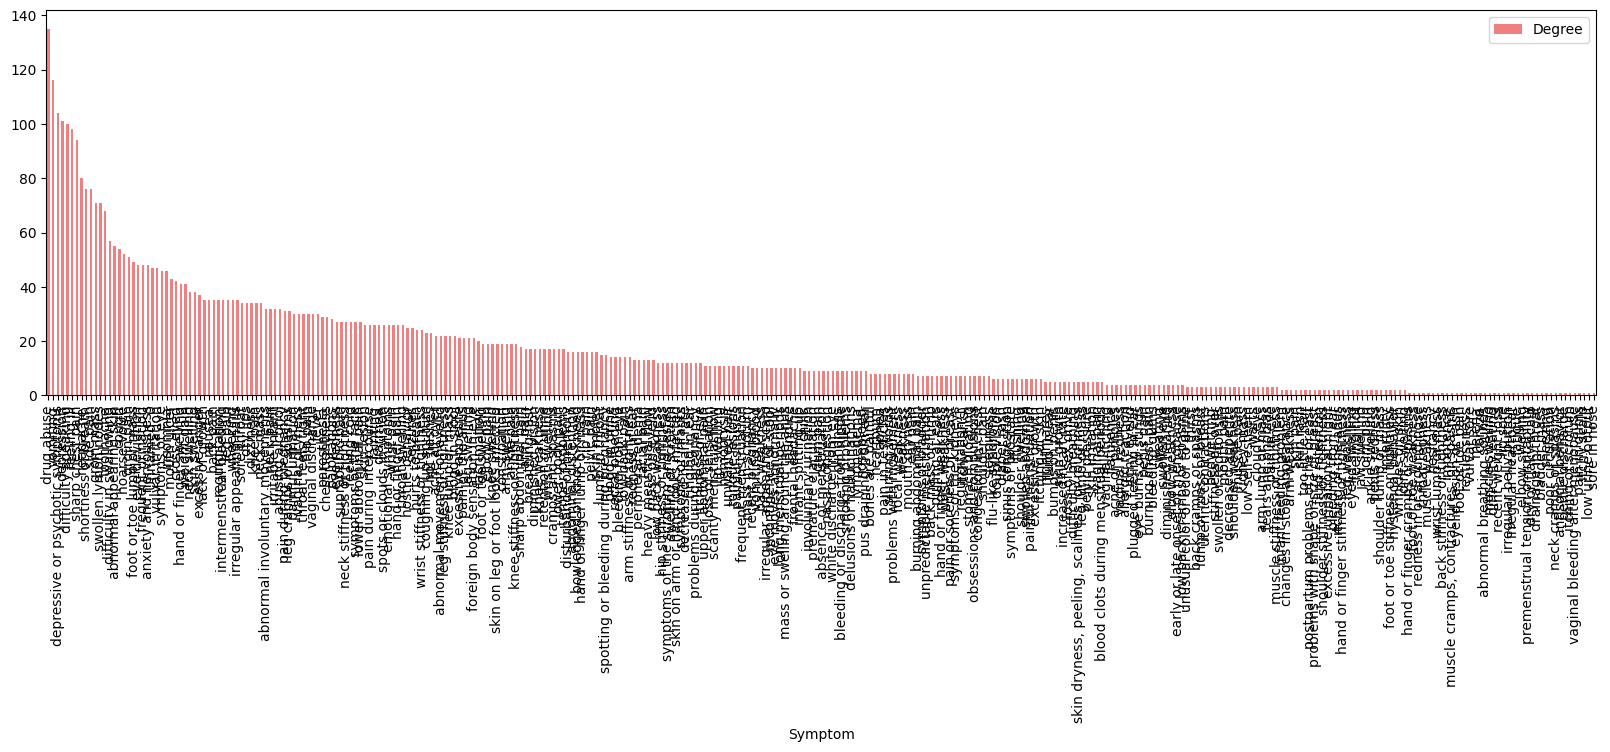

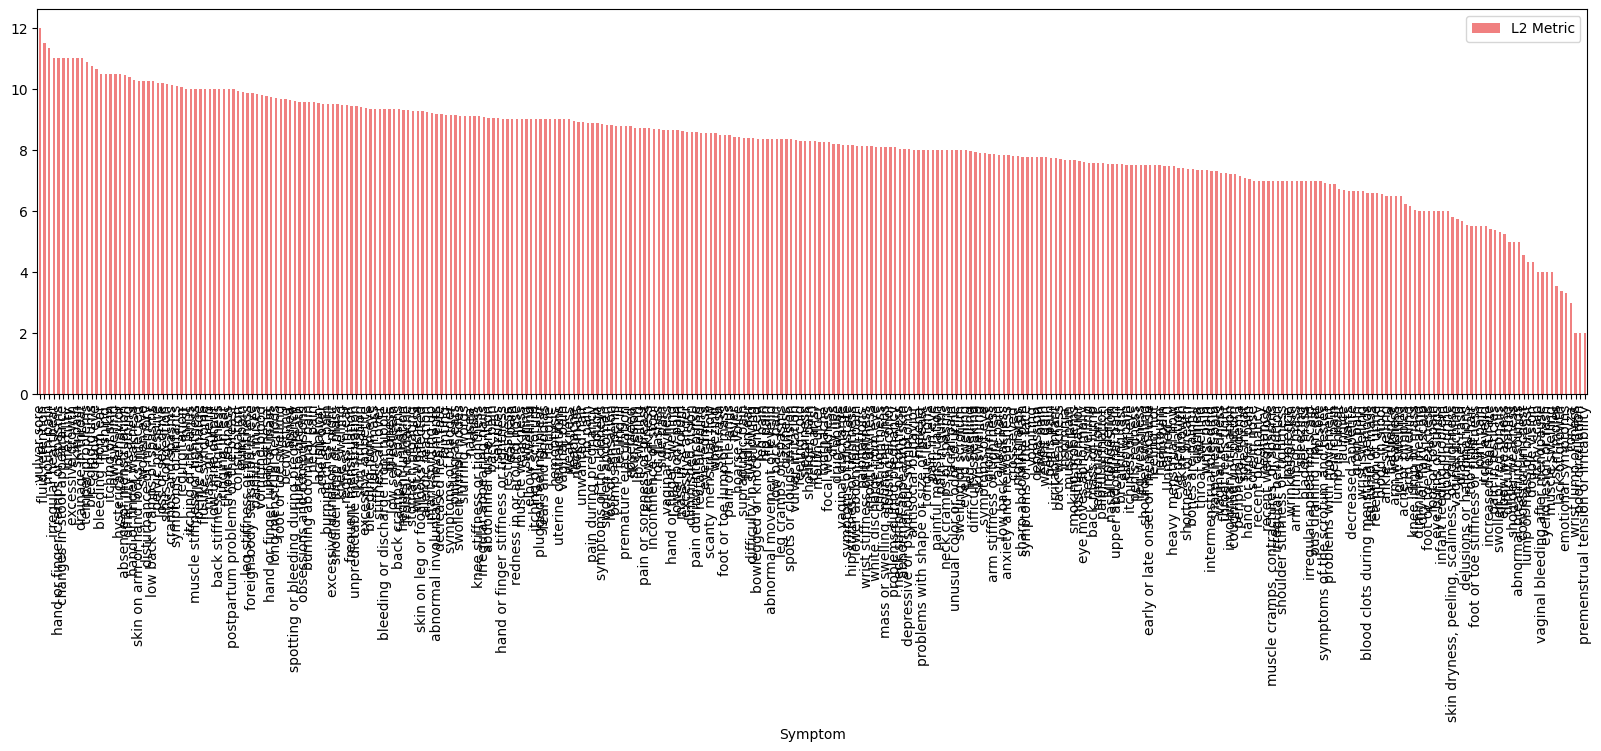

In [9]:
data_onehot = pd.read_csv(
    "../../dataset/large_one_hot_encoding.csv", compression="gzip"
)
names = data_onehot.columns.values.tolist()
names = names[:-1]

# Sort the symptoms by degree
sorted_index = np.argsort(ks[:, 0])[::-1]
sorted_names = {names[i]: ks[i, 0] for i in sorted_index}
sorted_names_L1 = pd.DataFrame(sorted_names.items(), columns=["Symptom", "Degree"])
sorted_names_L1.plot.bar(x="Symptom", y="Degree", figsize=(20, 5), color="lightcoral")

# Sort the symptoms by L2
sorted_index = np.argsort(ks[:, 1])[::-1]
sorted_names = {names[i]: ks[i, 1] for i in sorted_index}
sorted_names_L2 = pd.DataFrame(sorted_names.items(), columns=["Symptom", "L2 Metric"])
sorted_names_L2.plot.bar(
    x="Symptom", y="L2 Metric", figsize=(20, 5), color="lightcoral"
)

## Compute features for the model

In [10]:
data_1 = np.load("../prediction_model/features/ks_level_1.npz")
x1, y1 = data_1["X"], data_1["y"]
print(x1.shape, y1.shape)

data_2 = np.load("../prediction_model/features/ks_level_2.npz")
x2, y2 = data_2["X"], data_2["y"]
print(x2.shape, y2.shape)

(246945, 328) (246945,)
(246945, 328) (246945,)


In [11]:
# For level 1
level = 1
ks_list = ks[:, level - 1].tolist()

x, y = fe.get_x_y(
    ks_list,
    data_onehot,
    store_path=f"../prediction_model/features/ks_level_{level}.npz",
)


# For level 2
level = 2
ks_list = ks[:, level - 1].tolist()

x, y = fe.get_x_y(
    ks_list,
    data_onehot,
    store_path=f"../prediction_model/features/ks_level_{level}.npz",
)